In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc # Podriamos importar todo con un solo comando: from sklearn.metrics import *
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

In [13]:
# Cargar el dataset
# Asegúrate de cargar el dataset en el mismo entorno o ajustar la ruta.
data = pd.read_csv("../data/creditcard_2023.csv")

# Selección de columnas relevantes según análisis de importancia
selected_columns = ['V4', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V2', 'V3', 'V7', 'V21', 'Amount', 'Class']
data_train = data[selected_columns]

In [14]:
data_train.head()

,V4,V10,V11,V12,V14,V16,V17,V2,V3,V7,V21,Amount,Class
0,-0.083724,0.637735,-0.987020,0.293438,0.549020,0.215598,0.512307,-0.469648,2.496266,0.519014,-0.110552,17982.10,0
1,-0.429654,0.529808,0.140107,1.564246,0.627719,0.789188,0.403810,-0.356045,0.558056,0.406466,-0.194936,6531.37,0
2,-0.457986,0.690708,-0.272985,0.659201,0.616874,-0.577514,0.886526,-0.949385,1.728538,0.743511,-0.005020,2513.54,0
3,-1.090178,0.575231,-0.752581,0.737483,0.559535,-0.030669,0.242629,-0.508959,1.746840,0.518269,-0.146927,5384.44,0
4,-0.448293,0.968046,-1.203171,1.029577,0.241454,0.224538,0.366466,-0.165280,1.527053,0.658849,-0.106984,14278.97,0


In [15]:
valores_unicos = data_train['Class'].unique()
print(valores_unicos)

[0 1]


In [16]:


# Separar características (X) y la variable objetivo (y)
X = data_train.drop(columns=['Class'])
y = data_train['Class']

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Escalar los datos (caracteristicas)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar el modelo de Regresión Logística
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

# Realizar predicciones
y_pred = model.predict(X_test_scaled)

# Evaluación del modelo
print("Matriz de Confusión:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

Matriz de Confusión:
[[55638  1225]
 [ 3259 53604]]


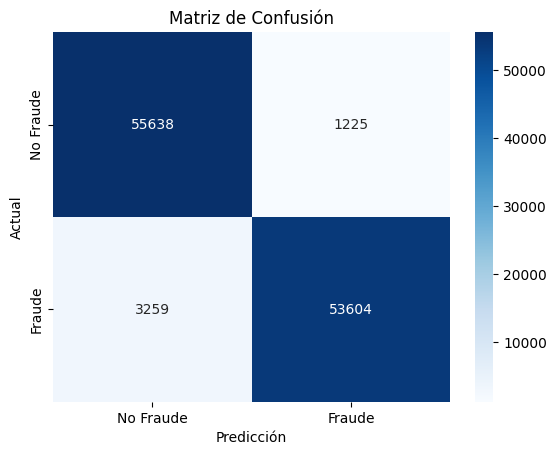

In [17]:
# Visualizar la matriz de confusión
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Fraude', 'Fraude'], yticklabels=['No Fraude', 'Fraude'])
plt.xlabel('Predicción')
plt.ylabel('Actual')
plt.title('Matriz de Confusión')
plt.show()

In [18]:
# Métricas de clasificación
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred))

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     56863
           1       0.98      0.94      0.96     56863

    accuracy                           0.96    113726
   macro avg       0.96      0.96      0.96    113726
weighted avg       0.96      0.96      0.96    113726



In [19]:
print(X_train.columns)

Index(['V4', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V2', 'V3', 'V7', 'V21',
       'Amount'],
      dtype='object')


In [22]:
# Ejemplo de nuevos datos de transacciones (reemplaza con tus datos)
nuevas_transacciones = pd.DataFrame({
    'V4': [1.5, -2.3],
    'V10': [-1.2, 0.5],
    'V11': [0.3, -1.7],
    'V12': [-0.7, 1.2],
    'V14': [1.8, -0.5],
    'V16': [-0.5, 0.7],
    'V17': [0.9, -1.4],
    'V2': [-0.5, 1.2],
    'V3': [0.4, 1.5],
    'V7': [-0.2, 0.8],
    'V21': [0.1, -0.3],
    'Amount': [100.0, 200.0]
})

# Escalar los nuevos datos
nuevas_transacciones_scaled = scaler.transform(nuevas_transacciones)

# Realizar predicciones
predicciones = model.predict(nuevas_transacciones_scaled)

# Mostrar resultados
nuevas_transacciones['Predicción'] = predicciones
nuevas_transacciones['Fraude'] = nuevas_transacciones['Predicción'].apply(lambda x: 'No_Fraude' if x == 0 else 'Fraude')

print(nuevas_transacciones[['Amount', 'Fraude']])

   Amount     Fraude
0   100.0     Fraude
1   200.0  No_Fraude


### Definir los residuos en clasificación

En un modelo de clasificación binaria (como en tu caso de detección de fraude), la predicción es una clase (0 o 1, "No Fraude" o "Fraude"). El "residuo" puede definirse como la diferencia entre la predicción y el valor verdadero, aunque en clasificación esto se mide de manera diferente, ya que no tienes un valor continuo, sino una clase.

Los residuos para un modelo de clasificación pueden ser interpretados de las siguientes maneras:

Falsos positivos: Predijiste que algo es fraude (1) cuando en realidad no lo es (0).

Falsos negativos: Predijiste que algo no es fraude (0) cuando en realidad lo es (1).

Verdaderos positivos: Predijiste correctamente que algo es fraude (1).

Verdaderos negativos: Predijiste correctamente que algo no es fraude (0).

### Cálculo de los residuos en clasificación

Para obtener un análisis de los "residuos" en clasificación, podemos usar las siguientes métricas:

Matriz de confusión: Te da una idea clara de cuántos falsos positivos, falsos negativos, verdaderos positivos y verdaderos negativos cometió el modelo.

Curva ROC y AUC (Área bajo la curva): Te permite visualizar cómo cambia el rendimiento del modelo en función de diferentes umbrales de clasificación.

Precisión, Recall y F1-Score: Evaluaciones de cuán bien está clasificando el modelo.

### Evaluación con la matriz de confusión

Primero, calculemos la matriz de confusión para entender cómo se están comportando los residuos de tu modelo (es decir, los falsos positivos, falsos negativos, verdaderos positivos y verdaderos negativos):

In [7]:
# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:")
print(conf_matrix)

# Reporte de clasificación: Precisión, Recall, F1-Score
class_report = classification_report(y_test, y_pred)
print("\nReporte de Clasificación:")
print(class_report)


Matriz de Confusión:
[[55638  1225]
 [ 3259 53604]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     56863
           1       0.98      0.94      0.96     56863

    accuracy                           0.96    113726
   macro avg       0.96      0.96      0.96    113726
weighted avg       0.96      0.96      0.96    113726



### Curva ROC y AUC

La Curva ROC y el Área bajo la curva (AUC) son herramientas útiles para evaluar cómo se comporta el modelo a diferentes umbrales de decisión. Puedes evaluar la calidad del modelo incluso cuando la precisión de clasificación es imbalanced (en problemas como detección de fraude, donde el fraude es mucho menos frecuente que las transacciones normales).

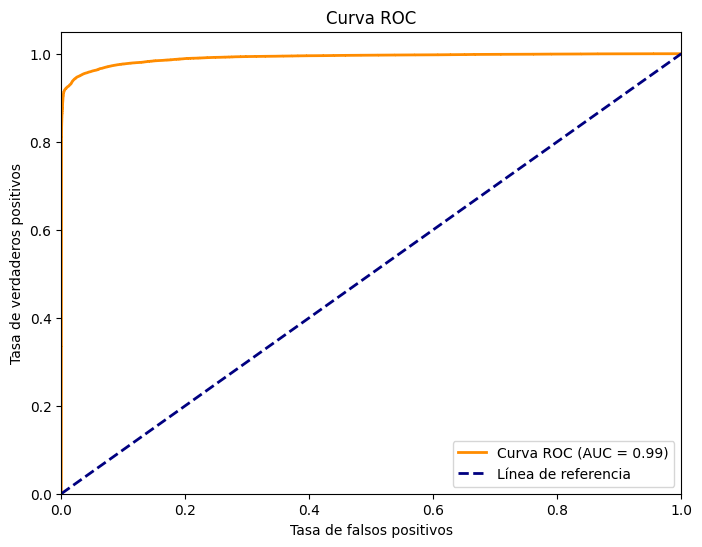

AUC: 0.991139188722077


In [8]:
# Obtener las probabilidades de las clases
y_prob = model.predict_proba(X_test_scaled)[:, 1]  # Probabilidad de clase positiva (fraude)

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calcular el área bajo la curva (AUC)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Línea de referencia')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

print(f"AUC: {roc_auc}")


### Ajuste del modelo para mejorar la precisión

Basándote en la evaluación de los residuos (falsos positivos y falsos negativos), puedes realizar varias acciones para mejorar el modelo:

1. Reajustar el umbral de clasificación: En lugar de usar el umbral estándar de 0.5 para hacer la clasificación, puedes ajustarlo para ser más conservador en la predicción de fraudes. Por ejemplo, podrías bajar el umbral para que el modelo sea más sensible a las transacciones fraudulentas (es decir, se incline más hacia predecir "Fraude").

In [9]:
# Ajuste del umbral
nuevo_umbral = 0.3  # Umbral más bajo
y_pred_nuevo = (y_prob >= nuevo_umbral).astype(int)

# Evaluar nuevamente
print(confusion_matrix(y_test, y_pred_nuevo))
print(classification_report(y_test, y_pred_nuevo))

[[54115  2748]
 [ 2290 54573]]
              precision    recall  f1-score   support

           0       0.96      0.95      0.96     56863
           1       0.95      0.96      0.96     56863

    accuracy                           0.96    113726
   macro avg       0.96      0.96      0.96    113726
weighted avg       0.96      0.96      0.96    113726



### Guardando el modelo

In [11]:
joblib.dump(model, '../model/modelo_fraude.joblib')
print("Modelo guardado como 'modelo_fraude.joblib'")

Modelo guardado como 'modelo_fraude.joblib'


### Guardamos el preprocesador

In [26]:
joblib.dump(scaler, '../model/scaler.joblib')
print("Scaler guardado como 'scaler.joblib'")

Scaler guardado como 'scaler.joblib'
